# Case Study Marketing - Customer Segmentation

Analysis of a customer data set, performing customer segmentation for tailored marketing campaigns.
I ask and try to answer questions like:
- What differentiates customers, what do they have in common?
- How can an algorithm perform customer segmentation?
- Which method yields best results?

Methods employed:
- Analyzing, imputing and scaling of data
- K-Means clustering with optimized number of clusters (using the elbow method)
- Autoencoder for dimensionality reduction
- PCA for dimensionality visualization, comparing original and autoencoded data

Tools and frameworks that I used:
- Pandas
- Numpy
- Matplotlib, Seaborn
- Scikit-learn
- Tensorflow, Keras

*Data and inspiration from: https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/*

## 1. Import, analyze and pre-clean data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [10,8]

customer_df = pd.read_csv('Marketing_data.csv')

In [144]:
customer_df.head(3)
customer_df.info()
customer_df.describe(include='all')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


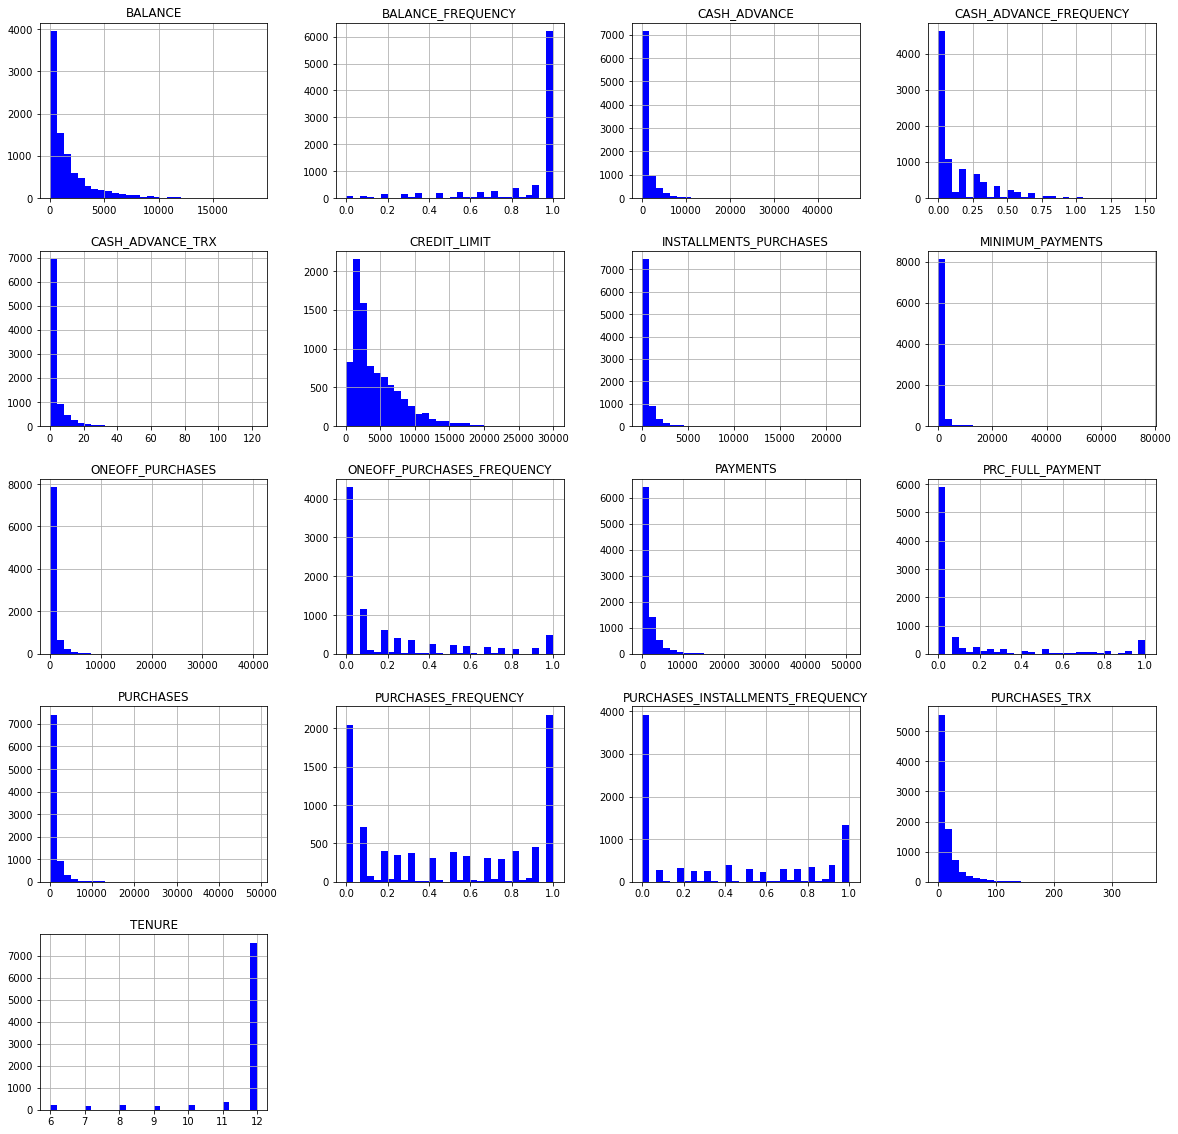

In [81]:
customer_df.hist(bins=30, figsize=(20,20), color='blue');

##### Alternatively: KDE distplots
- Combination of Kernel Density Estimate and Histogram plots
- Used to visualize the probability density of a continuous variable

In [ ]:
plt.figure(figsize=(10,50))
for i in range(customer_df.columns):
    plt.subplot(17,1,i+1)
    sns.distplot(customer_df[customer_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'r'})
    plt.title(customer_df.columns[i])
plt.tight_layout();

In [70]:
# Check outliers / entries with max values
customer_df[customer_df['ONEOFF_PURCHASES'] == customer_df.ONEOFF_PURCHASES.max()]
customer_df[customer_df['CASH_ADVANCE'] == customer_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#### Observations
- Customer behaviour can be approximated:
    - Regular balance update, ~1000$/purchase, ~11 years tenure, Cash advance used rarely
    - Two groups of customers distinct in their 'PURCHASE_FREQUENCY'
    - Most customers use their card frequently (BALANCE_FREQUENCY of 1)
- Inspection of customers with extreme values to understand business case

### Find missing values
- Check how many entries for each feature are empty

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

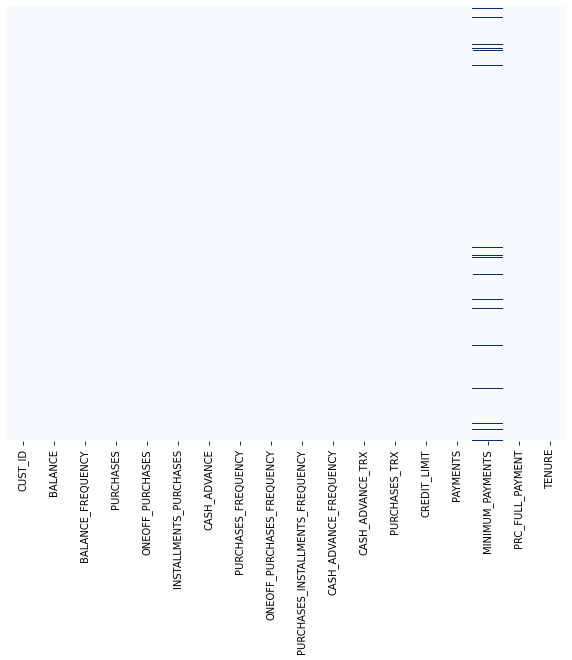

In [96]:
sns.heatmap(customer_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
customer_df.isnull().sum()

### Feature selection & engineering
- Handle missing values
  - CREDIT_LIMIT: fill with mean
  - MINIMUM_PAYMENTS: fill with mean
- Check for duplicate values
- Drop unnecessary columns
  - CUST_ID

In [2]:
customer_df.loc[(customer_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = customer_df['CREDIT_LIMIT'].mean()
customer_df.loc[(customer_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = customer_df['MINIMUM_PAYMENTS'].mean()

print('Duplicate rows: ',customer_df.duplicated().sum())
print('Duplicate CUST_IDs: ',customer_df.CUST_ID.duplicated().sum())
customer_df.drop('CUST_ID', axis=1, inplace=True)

0

0

### Feature correlation map

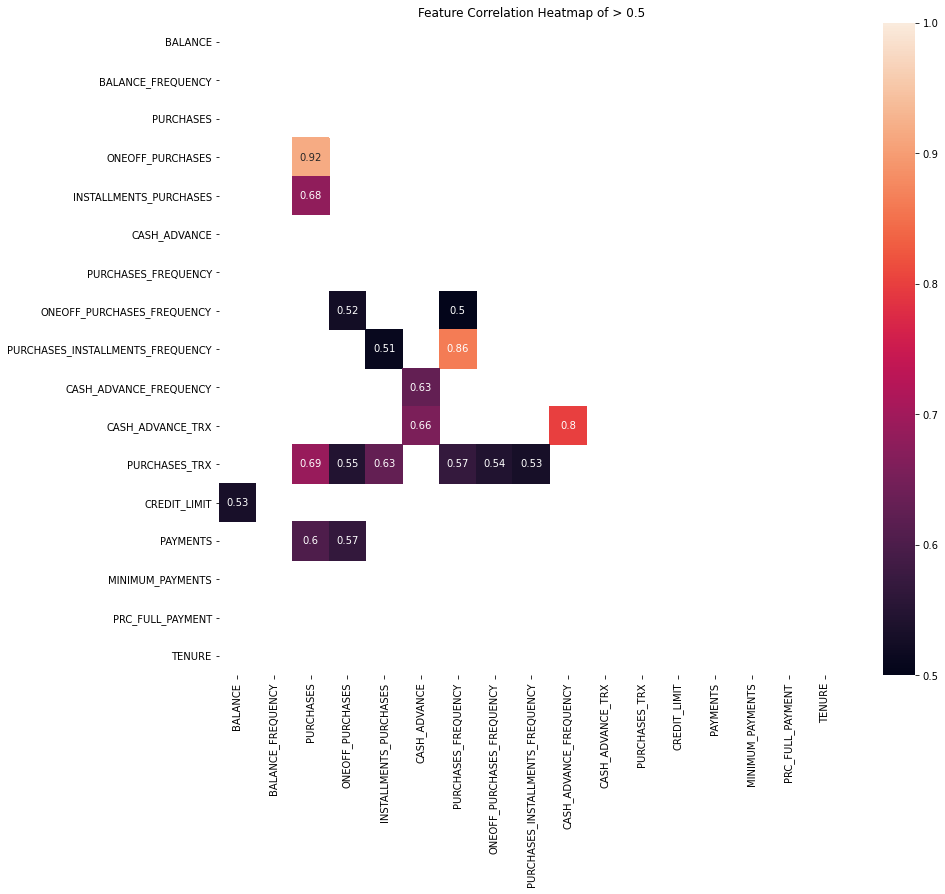

In [19]:
def feature_corr_map(df, corr_limit=None, limit_value=None):
    '''Create heatmap of given DataFrame, either with all values or limited to correlations above or below a certain value (only lower triangle of matrix is shown).'''
    fig = plt.figure(figsize=(14,12))
    if corr_limit == 'over':
        title = 'Feature Correlation Heatmap of > ' + str(limit_value)
        corr_features = (df.corr()[df.corr() > limit_value])
        vmin=limit_value
        vmax=1
    elif corr_limit == 'under':
        title = 'Feature Correlation Heatmap of < ' + str(limit_value)
        corr_features = (df.corr()[df.corr() < limit_value])
        vmin=0
        vmax=limit_value
    else:
        title = 'Feature Correlation Heatmap'
        corr_features = df.corr()
        vmin=0
        vmax=1
    plt.title(title)
    mask = np.zeros_like(corr_features)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_features, annot=True, mask=mask, vmin=vmin, vmax=vmax)
    return

#feature_corr_map(customer_df)
#feature_corr_map(customer_df, 'under', 0)
feature_corr_map(customer_df, 'over', 0.5)

## 2. Prepare for ML algorithms
- Scale features
- Split test data from train data

In [3]:
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)
customer_df_scaled.shape
customer_df_scaled

(8950, 17)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## 3. Clustering with K-Means
- Unsupervised clustering of the customers, i.e. by Euclidian distance
- Optimization of ideal number of clusters by Elbow Method
  - Using X_train training subset of customer_df_scaled data
  - Minimize Within Cluster Sum of Squares (WCSS) for all points in all cluster
  - Plot WCSS vs. No. of clusters to find lowest number of clusters with low WCSS
  
### 3.1 Finding optimal number of clusters

C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


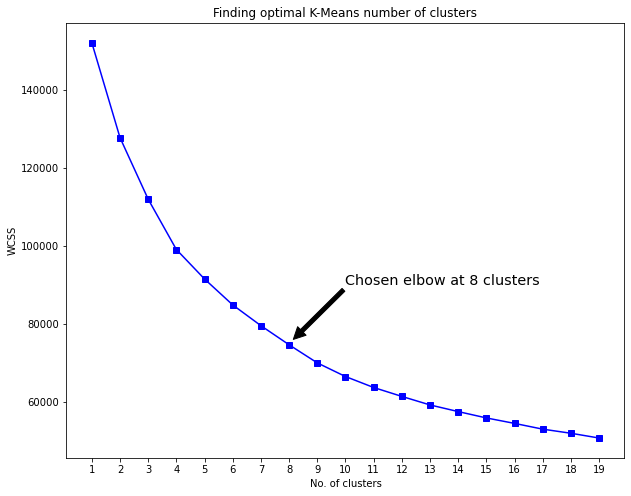

In [107]:
def find_clusters(data):
    scores = []

    no_clusters = range(1, 20)

    for i in no_clusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data) # X_train
        scores.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    plt.plot(scores_1, 's-b')
    plt.xlabel('No. of clusters')
    plt.ylabel('WCSS')
    plt.title('Finding optimal K-Means number of clusters')
    ax.set_xticklabels(no_clusters)
    plt.xticks([x-1 for x in no_clusters])
    return scores, ax

scores_1, ax_1 = find_clusters(customer_df_scaled)
ax_1.annotate('Chosen elbow at 8 clusters', size='x-large', xytext=(9,90000), xy=(7.15,76000), arrowprops={'facecolor':'black'})
plt.show();

#### Result
- Somewhere between 7 and 9 clusters seem to be an ideal trade-off

### 3.2 Applying K-Means clustering
- Assign each data point to a cluster
- Add fitted cluster label to each customer as new feature in original dataframe

In [140]:
n_clusters = 8
kmeans = KMeans(n_clusters)
kmeans.fit(customer_df_scaled) # X_train
labels = kmeans.labels_
print('Shape of clusters / \'labels\'', labels.shape)
print('Min cluster value: ', labels.min())
print('Max cluster value: ', labels.max())

KMeans()

Shape of clusters / 'labels' (8950,)
Min cluster value:  0
Max cluster value:  7


In [141]:
# customer_df_cluster = pd.concat([customer_df, pd.DataFrame({'Cluster':labels})], axis=1)
customer_df_cluster = pd.concat([customer_df, pd.DataFrame({'Cluster':labels})], axis=1)
customer_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


#### Show cluster centers for all features
- Inverse scaling of data
- Display each cluster with its center values for the features
- Create histograms for each feature and each cluster

In [7]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=[customer_df.columns])
(cluster_centers.style
    .background_gradient(cmap='Blues')
    .highlight_max(color='black', axis=0))

#plt.figure(figsize=(20,16))
#sns.heatmap(cluster_centers, annot=True);

#### Cluster analysis
- Plot of each feature for each found cluster

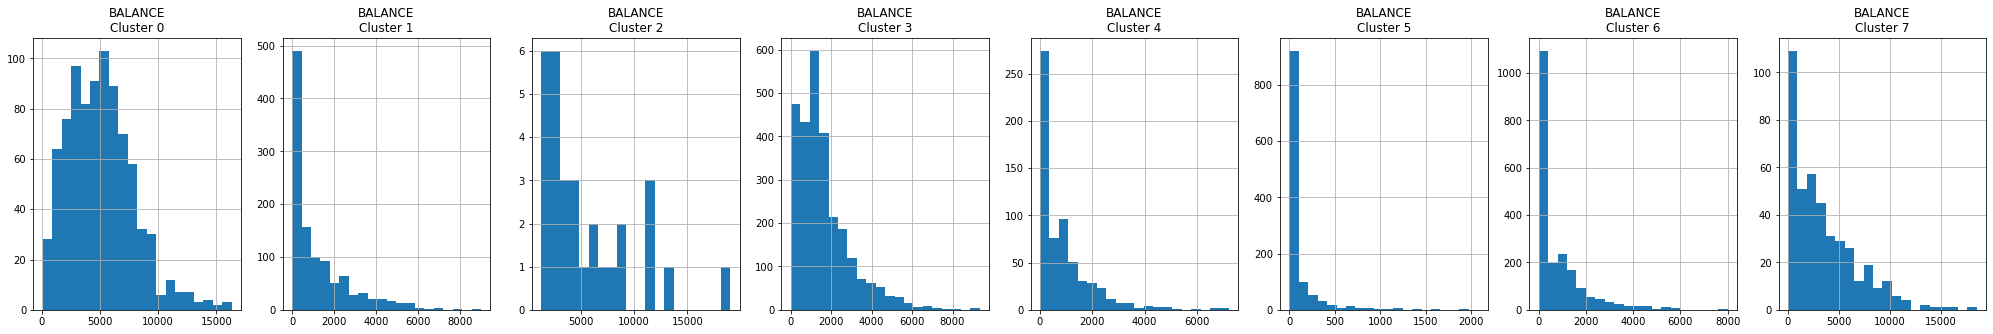

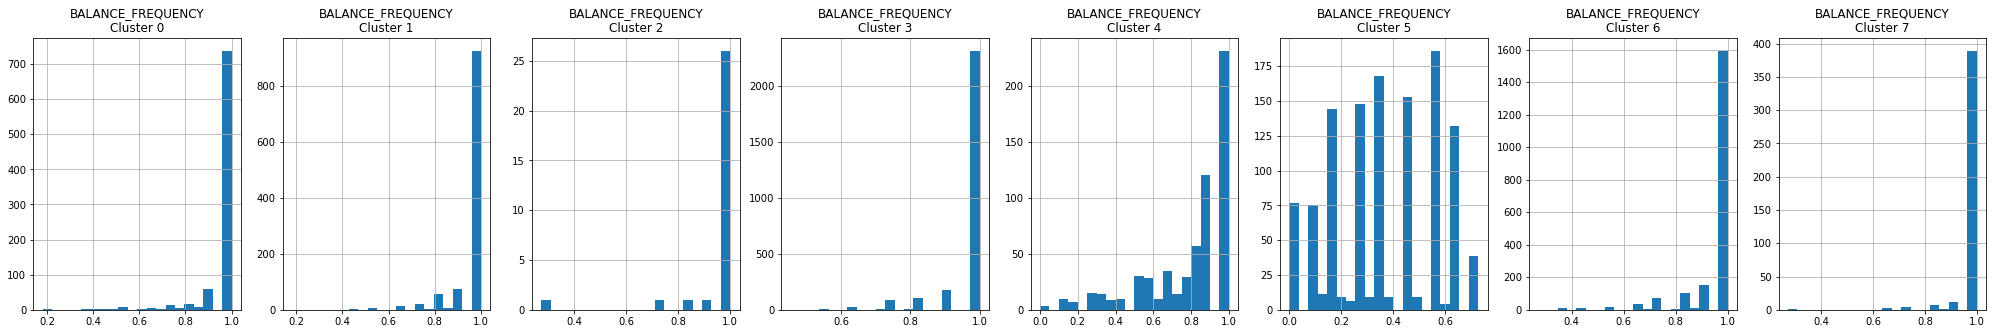

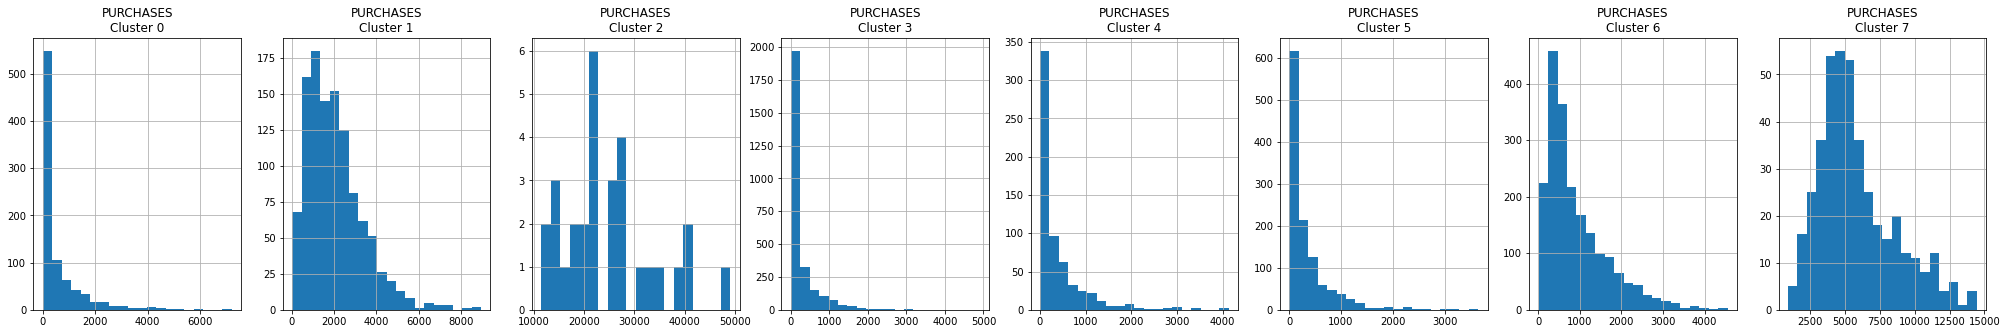

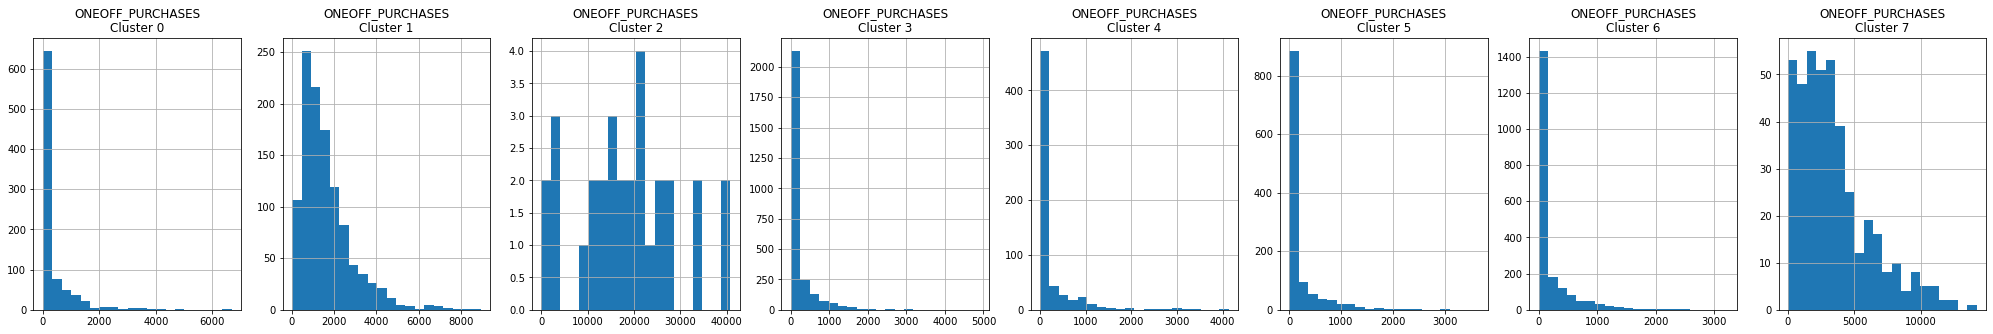

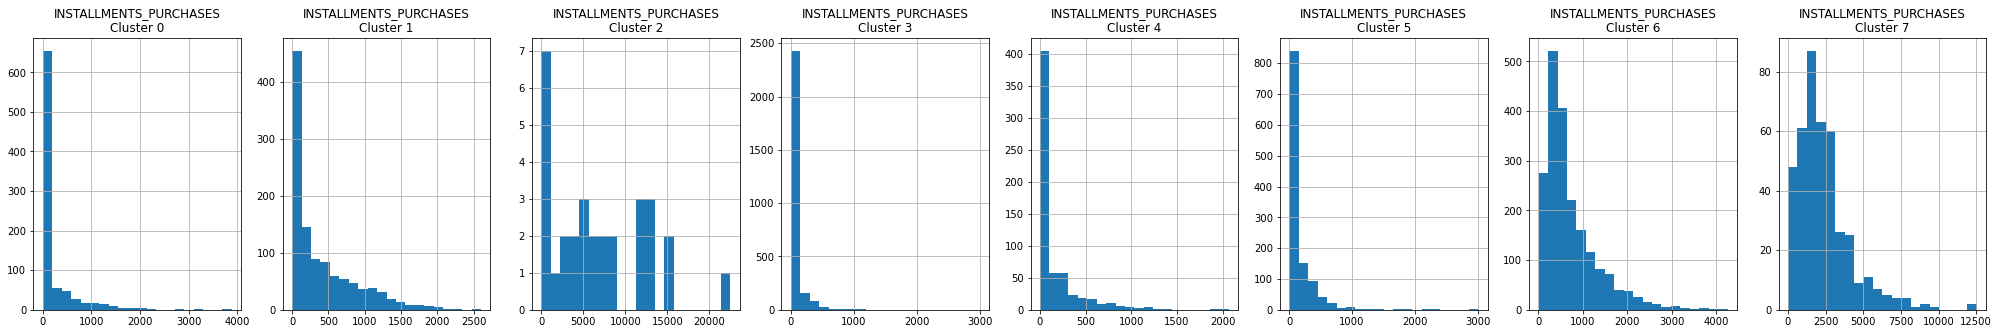

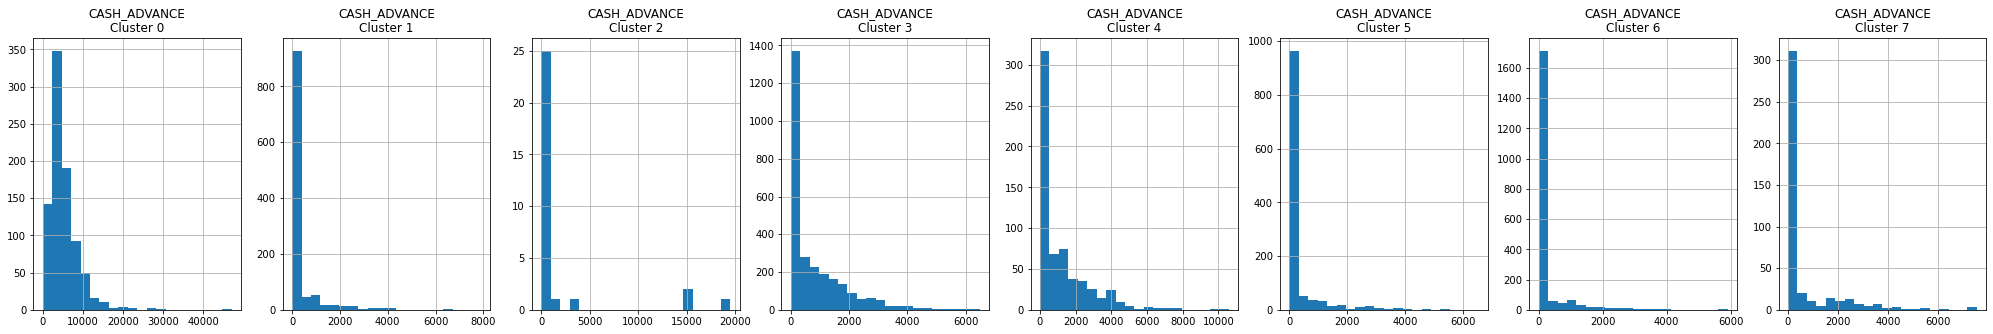

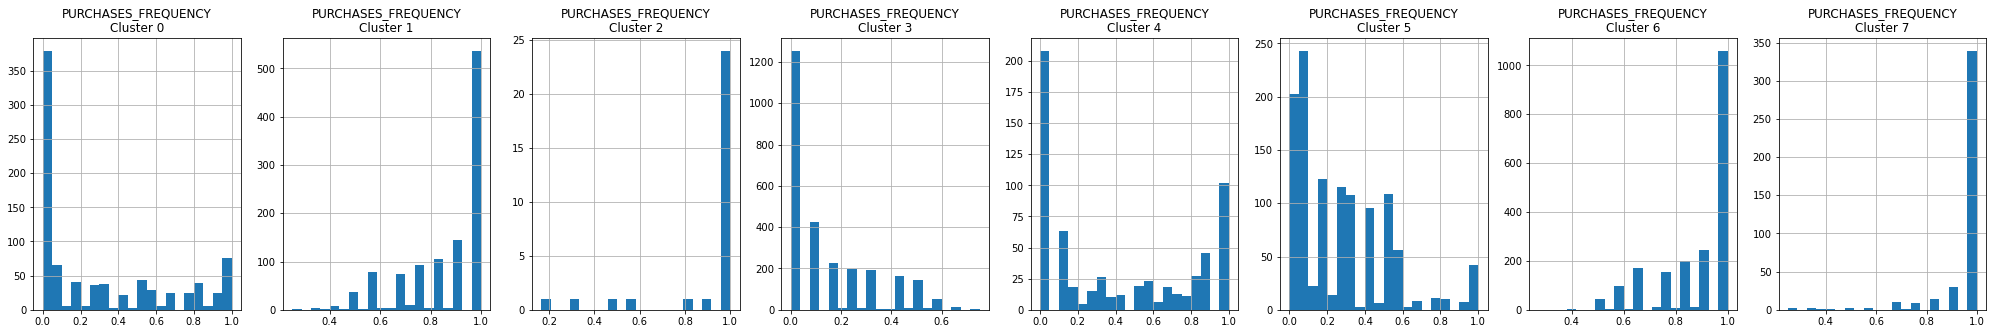

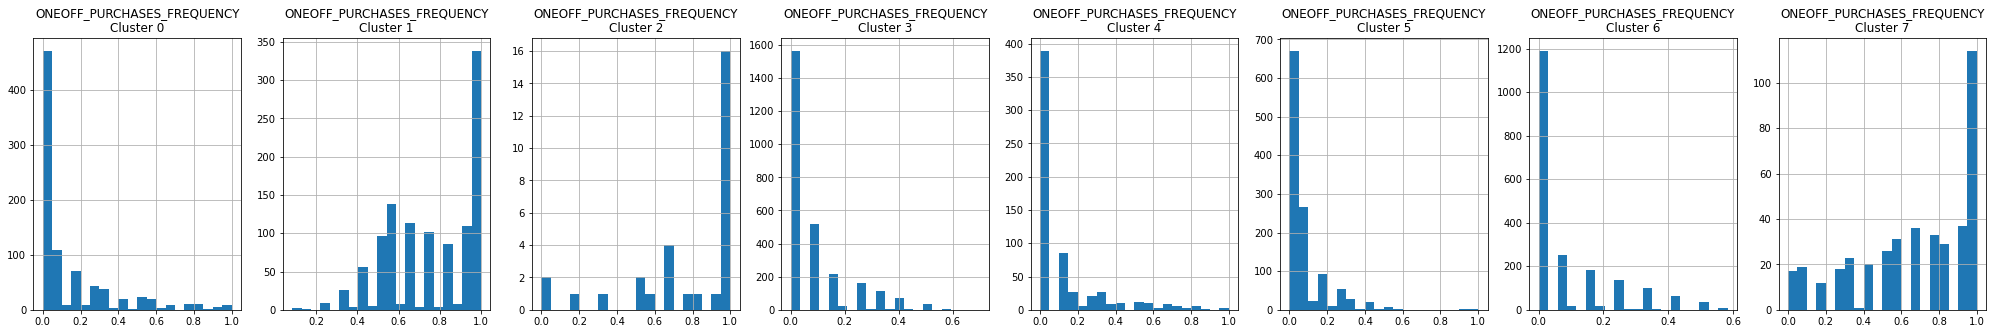

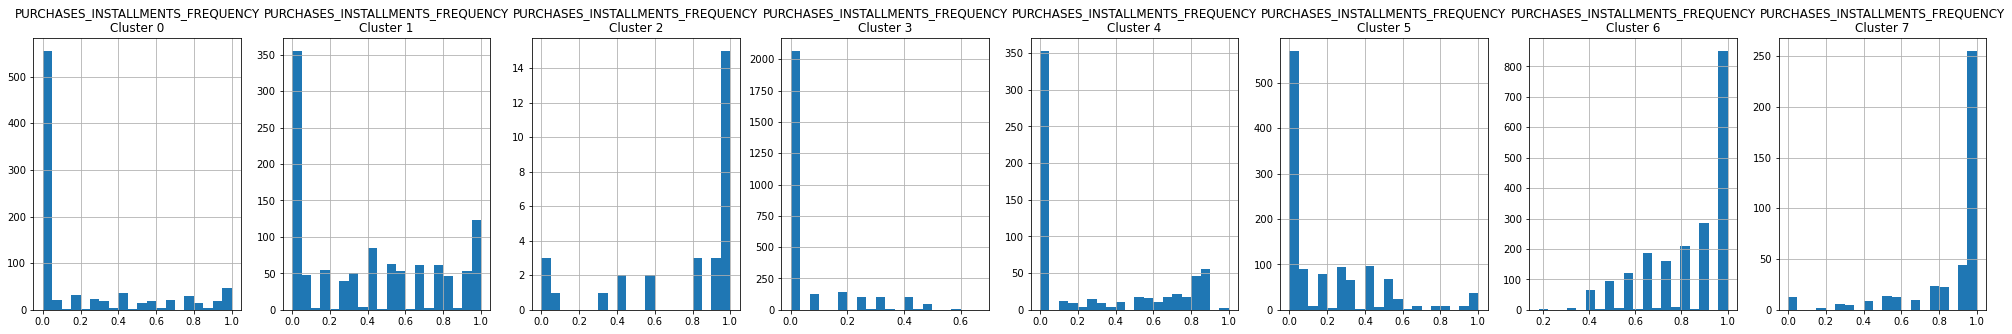

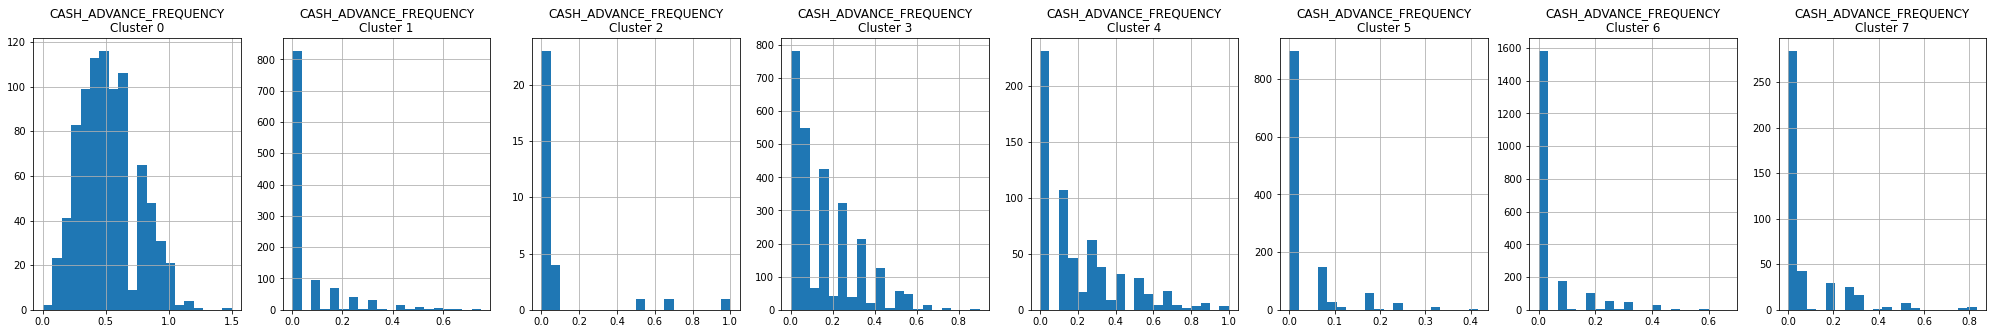

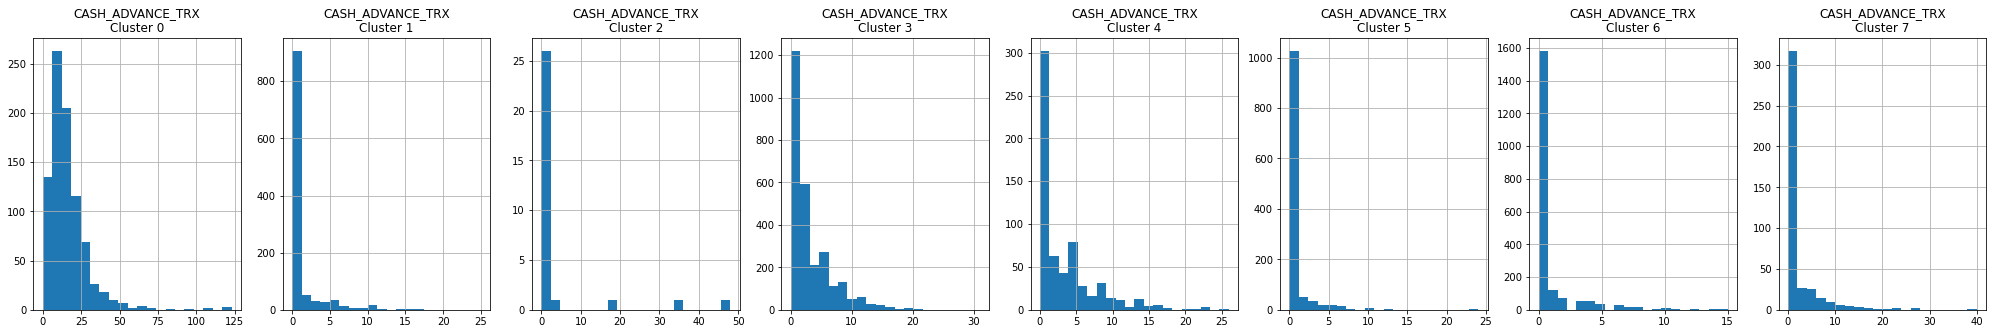

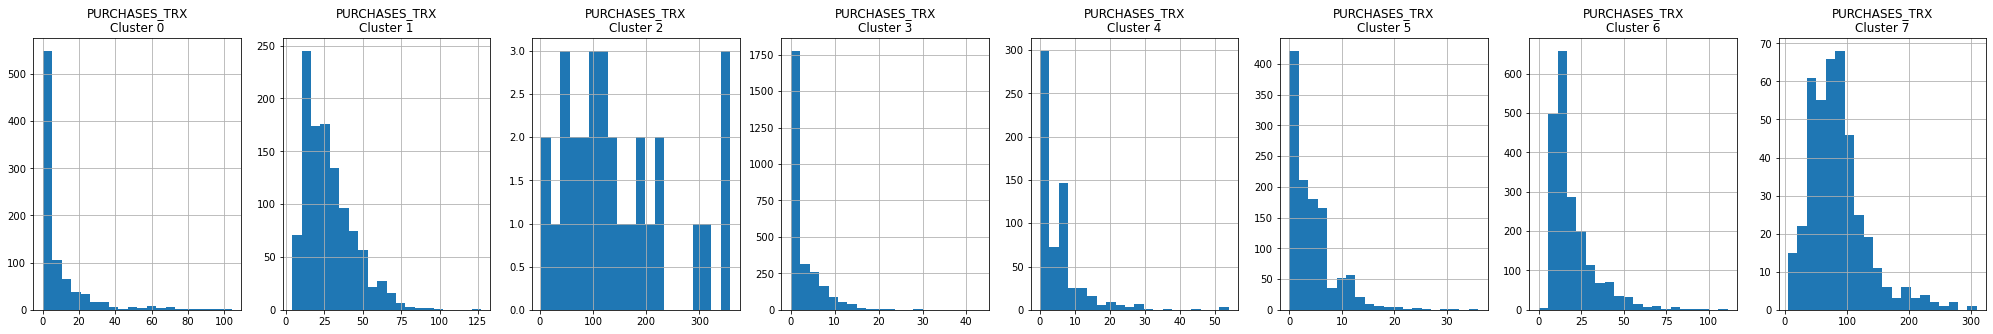

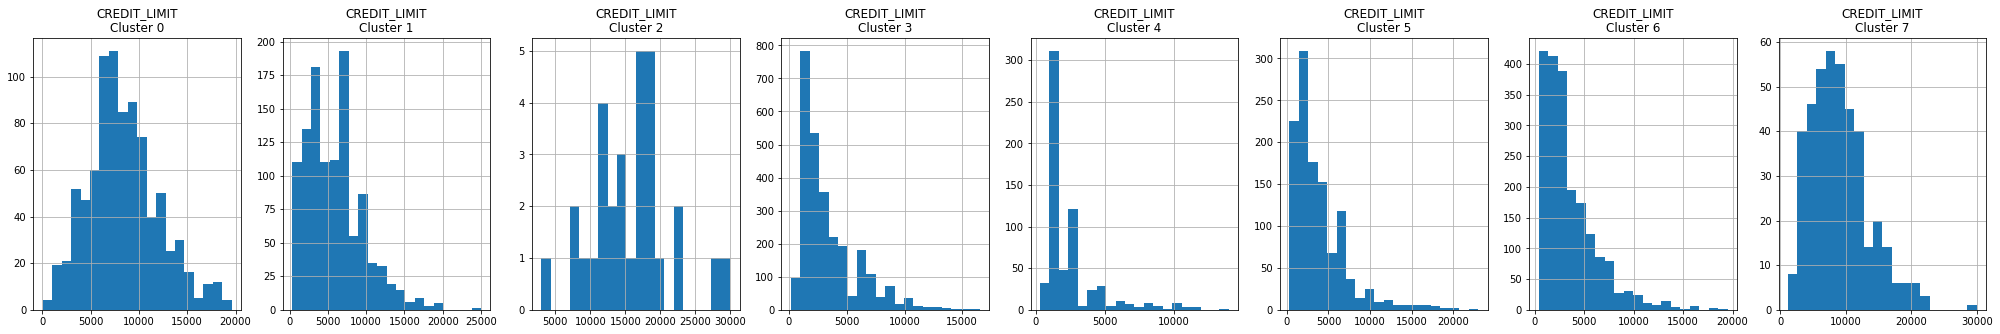

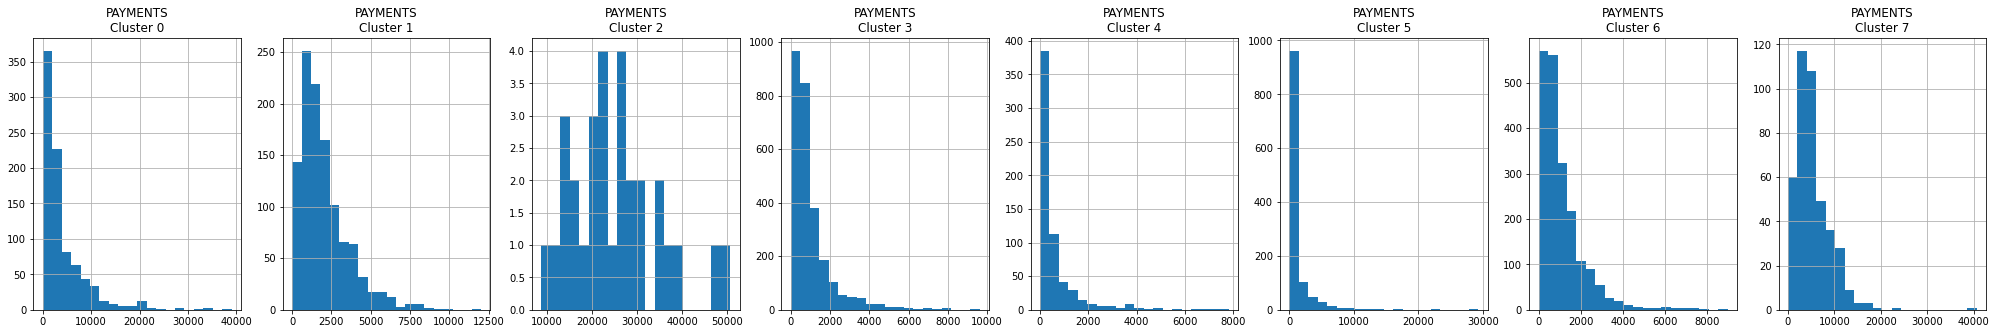

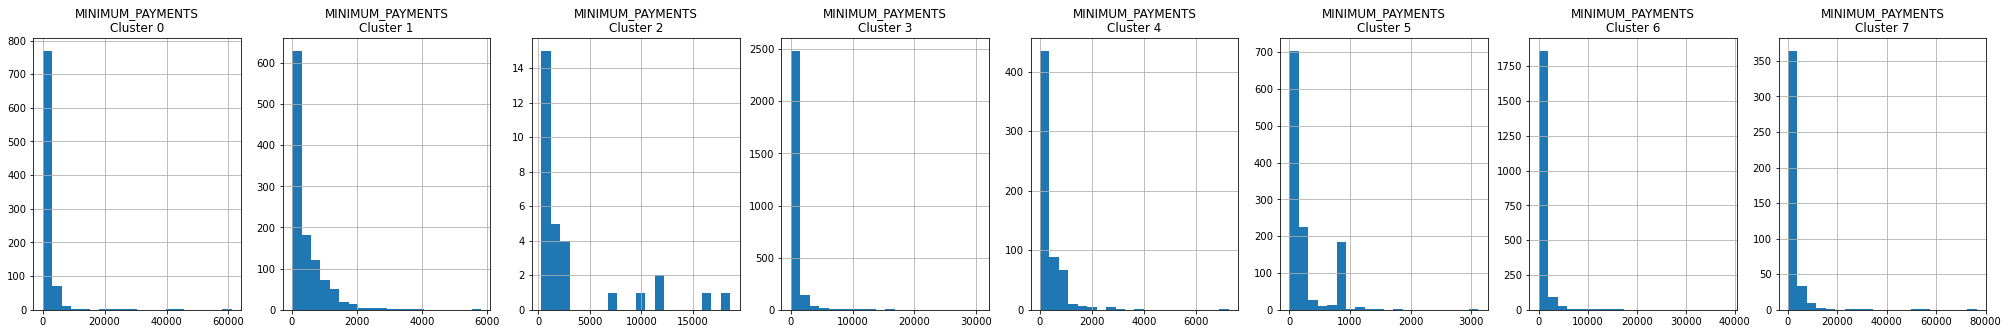

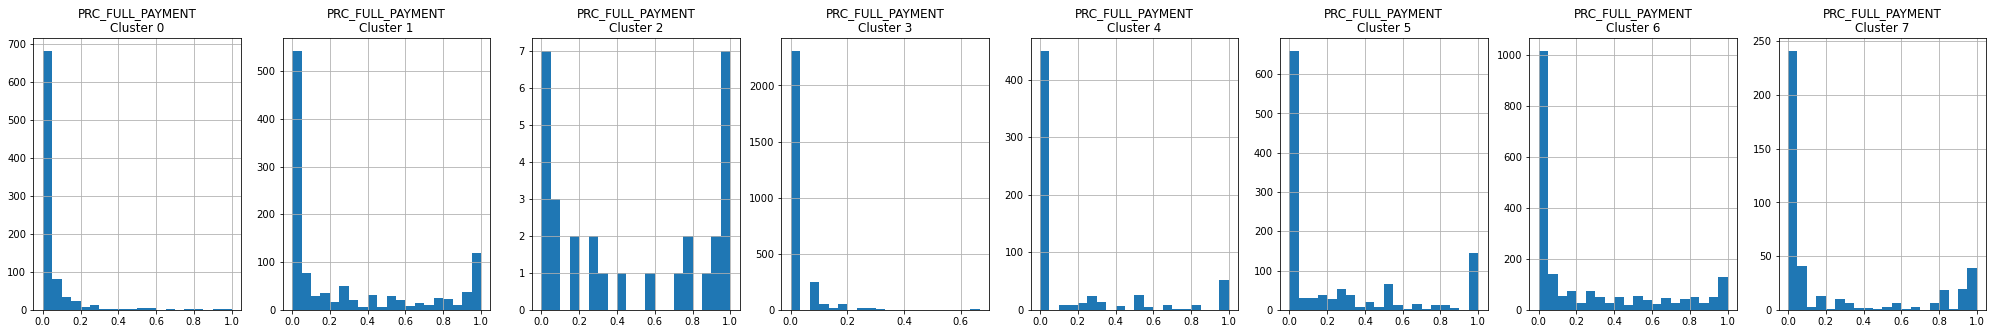

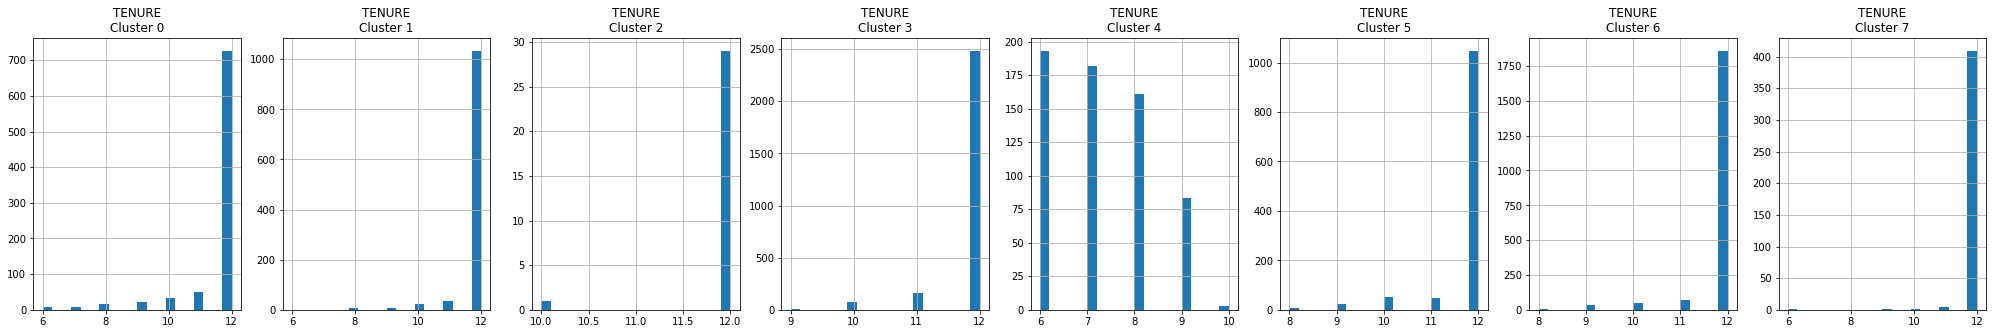

In [62]:
for i in customer_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(n_clusters):
        plt.subplot(1,n_clusters,j+1)
        cluster = customer_df_cluster[customer_df_cluster['Cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}\nCluster {}'.format(i,j))
plt.show();

### 3.3 PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Do PCA after cleaning, wrangling, feature engineering and after train-test-split, **exclusively on the training data set**
- To demonstrate clusters, the full dataset was used; in production use pipeline to have identical distribution of train and test data in preparation, pca and analysis steps

array([0.27290037, 0.20301991])

-21.60150609025434

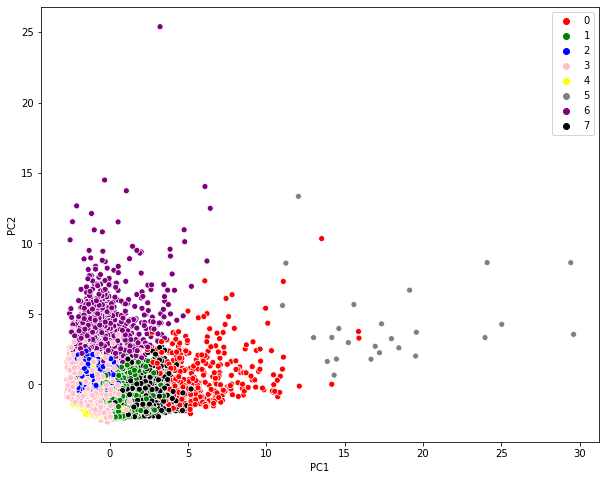

In [148]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(customer_df_scaled)
pca.explained_variance_ratio_
pca.score(customer_df_scaled)

pca_df = pd.DataFrame(principal_comp, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
#plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=pca_df.cluster.tolist(), palette =['red','green','blue','pink','yellow','gray','purple','black'])

#### Observation
- Partially overlapping clusters

## 4. Dimensionality Reduction using Autoencoder
- A neural net where the input is passed to a bottleneck and then ouput again in the original dimensionality.
- Through the bottleneck a dimensionality reduction is performed *while keeping the data consistent with the input data throught training of the net*.

### 4.1 Creating and training the autoencoder model

In [41]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

Using TensorFlow backend.


In [82]:
input_df = Input(shape = (customer_df_scaled.shape[1],)) # 17
input_model = Dense(7, activation = 'relu')(input_df)
input_model = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(input_model)
input_model = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(input_model)
input_model = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(input_model)

encoder_model = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(input_model)

output_model = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoder_model)
output_model = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(encoder_model)

decoded_model = Dense(customer_df_scaled.shape[1], kernel_initializer='glorot_uniform')(output_model)

# Autoencoder
autoencoder = Model(input_df, decoded_model)
# Encoder
encoder = Model(input_df, encoder_model)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()
ae_result = autoencoder.fit(customer_df_scaled, customer_df_scaled, batch_size=128, epochs=25, verbose=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               5500

{'batch_size': 128, 'epochs': 25, 'steps': 70, 'samples': 8950, 'verbose': 1, 'do_validation': False, 'metrics': ['loss']}


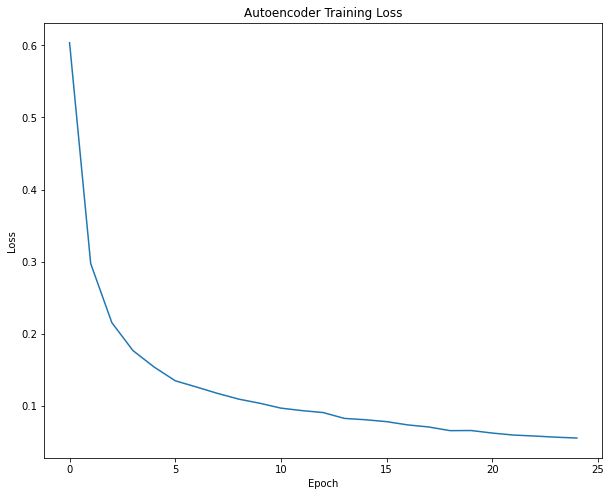

In [78]:
print(ae_result.params)

plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
sns.lineplot(x=range(0,len(ae_result.history['loss'])), y=ae_result.history['loss'])
plt.show();

### 4.2 Apply K-Means clustering on encoded features
- Encode features with reduced dimensionality (from 17 to 10 features with encoder_model)
- Find optimal number of clusters
- Perform K-Means clustering
- Visualize PCA

In [85]:
pred_data = encoder.predict(customer_df_scaled)
pred_data.shape

(8950, 10)

C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


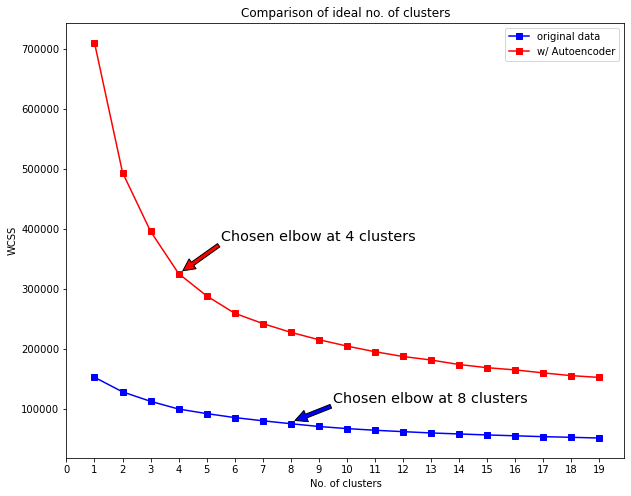

In [131]:
fig, ax = plt.subplots()
plt.title('Comparison of ideal no. of clusters')
plt.plot(scores_1, 's-b')
plt.plot(scores_2, 's-r')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.legend(('original data', 'w/ Autoencoder'))
ax.set_xticklabels(range(0,20))
plt.xticks([x-1 for x in range(0,20)])
ax.annotate('Chosen elbow at 4 clusters', size='x-large', xytext=(4.5,380000), xy=(3.15,330000), arrowprops={'facecolor':'red'})
ax.annotate('Chosen elbow at 8 clusters', size='x-large', xytext=(8.5,110000), xy=(7.15,80000), arrowprops={'facecolor':'blue'})
plt.show();

In [150]:
n_clusters = 4
kmeans = KMeans(n_clusters)
kmeans.fit(pred_data)
labels = kmeans.labels_
print('Shape of clusters / \'labels\'', labels.shape)
print('Min cluster value: ', labels.min())
print('Max cluster value: ', labels.max())

KMeans(n_clusters=4)

Shape of clusters / 'labels' (8950,)
Min cluster value:  0
Max cluster value:  3


In [136]:
customer_df_dr = pd.concat([customer_df, pd.DataFrame({'Cluster':labels})], axis=1)
customer_df_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


array([0.5735768 , 0.19346948], dtype=float32)

-20.818865

,PC1,PC2,cluster
0,-6.751601,-0.255762,0
1,5.584807,4.838874,2
2,-1.354743,-1.466653,0
3,-2.180447,1.084469,0
4,-6.446267,0.354927,0
...,...,...,...
8945,2.176541,-1.451415,3
8946,-0.272906,1.269088,0
8947,0.434070,-0.192390,3
8948,-0.114290,2.948306,0


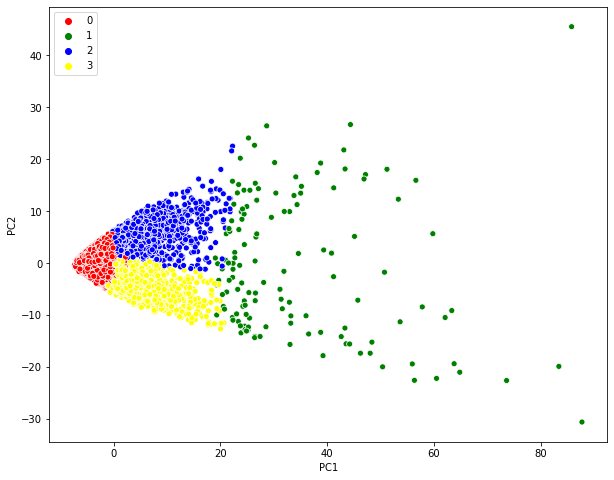

In [151]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(pred_data)
pca.explained_variance_ratio_
pca.score(pred_data)

pca_df = pd.DataFrame(principal_comp, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
ax = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=pca_df.cluster.tolist(), palette =['red','green','blue','yellow'])
pca_df

#### Observation
- Clear segmentation into 4 clusters